## Gridding

This notebook shows how you can easily make Cartesian grids from radar files using Py-ART.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pyart
%pylab inline
import cartopy.crs as ccrs


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Populating the interactive namespace from numpy and matplotlib


Let's load and display our radar file!

In [2]:
radar = pyart.io.read('../inf_tutorial_data/110635.mdv')

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 13:18:48.549000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 13:23:06.807000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


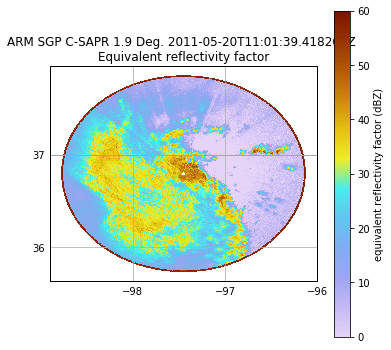

In [5]:
display = pyart.graph.RadarMapDisplayCartopy(radar)
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
display.plot_ppi_map('reflectivity', sweep=2, resolution='50m',
                     vmin=0, vmax=60, 
                     projection=ccrs.PlateCarree(), cmap='pyart_LangRainbow12')


Py-ART has the Grid object which has characteristics that are similar to that of the Radar object, except that the data are stored in Cartesian coordinates instead of the radar's coordinates. Much like the Radar object, the fields are accessible by simply accessing grid.fields['field_name']['data'], and the object contains parameters such as the radar's location and projection. Full information about the Grid object is available here:

http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Grid.html

We can create a Grid object from a Radar object by using pyart.map.grid_from_radars()

In [46]:
Grid = pyart.map.grid_from_radars([radar], grid_shape=(41, 201, 201), 
                                  grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)),
                                  gatefilter=gatefilter)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 14:02:13.672000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


The Display module contains routines for plotting gridded data in GridMapDisplay, which has functionality similar to RadarMapDisplayCartopy, except that basemap is used to draw the map instead of cartopy. The below example plots the Grid that was just made at the 1.5 km level. The level can be specified in the level parameter of plot_grid. Feel free to take the time to look at higher altitudes by changing this parameter.

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 13:37:20.072000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\mpl_toolkits\basemap\__init__.py:4749: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


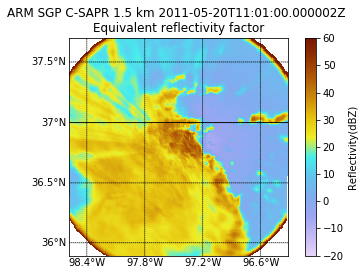

In [24]:
gdisplay = pyart.graph.GridMapDisplay(Grid)
gdisplay.plot_basemap(min_lat=35.5, max_lat=38, min_lon=-99, max_lon=-96,
                      lat_lines=np.linspace(35.5, 38, 6),
                      lon_lines=np.linspace(-99, -96, 6))
gdisplay.plot_grid('reflectivity', level=3, cmap='pyart_LangRainbow12', vmin=-20, vmax=60)

We can even do both longitudnal and latitudnal slices. Change the lat parameter to view different portions of the storm! 

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 13:37:57.640000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(-50, 50)

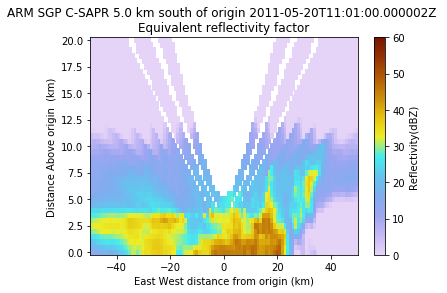

In [25]:
gdisplay.plot_latitude_slice('reflectivity', lat=36.75, cmap='pyart_LangRainbow12', vmin=0, vmax=60)
plt.xlim([-50,50])

As you can see, this Grid suffers from gaps in data as well as artificial "feathers" near the top that are simply the result of projecting the data to Cartesian coordinates. We would like to eliminate these as much as possible. Thankfully, Py-ART let's us, on top of specifying the grid resolution, also place in a custom radius of influence which controls how many points surrounding the gate are factored into the interpolation. Let's try increasing the minimum radius of influence to 1.75 km!

In [44]:
Grid_better = pyart.map.grid_from_radars([radar], grid_shape=(41, 201, 201), 
                                  grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)),
                                  roi_func='dist_beam', min_radius=1750.0)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 13:55:59.712000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


As you can see, most of the artifacts at higher altitudes have been smoothed out, but we have lost some spatial resolution as a result.

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 13:56:00.818000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(-50, 50)

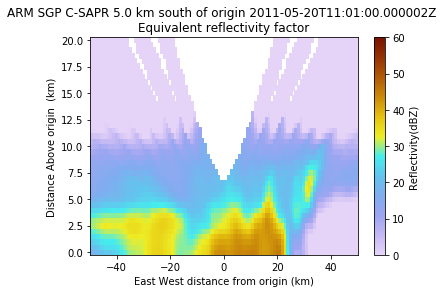

In [45]:
gdisplay = pyart.graph.GridMapDisplay(Grid_better)
gdisplay.plot_latitude_slice('reflectivity', lat=36.75, cmap='pyart_LangRainbow12', vmin=0, vmax=60)
plt.xlim([-50,50])

# Exercise

Using the above file, try out various grid configurations by changing the grid_shape and grid_limits! Increase the radius of influence until the artifacts that result from the gridding disappear. Or, change the resolution to minimize such artifacts! Which one do you think works best for this radar file? (Hint, this is a topic of ongoing research in the radar community!)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-03-07 14:22:49.993000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(-50, 50)

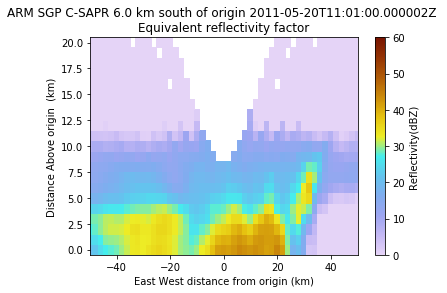

In [51]:
Grid_better = pyart.map.grid_from_radars([radar], grid_shape=(21, 101, 101), 
                                  grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)),
                                  roi_func='dist_beam', min_radius=2000.0)
gdisplay = pyart.graph.GridMapDisplay(Grid_better)
gdisplay.plot_latitude_slice('reflectivity', lat=36.75, cmap='pyart_LangRainbow12', vmin=0, vmax=60)
plt.xlim([-50,50])

In [ ]:
%load one_possible_answer.py